# **Assignment 10**
# **Solar image processing to determine the angular velocity of EUV coronal wave**

### **Data Analysis for Space Weather | Instructor: Prof Podladchikova | April, 2021**
### **by Victoria Krivova, Polina Starodumova**

The objective of this assignment is to learn how to derive the angular velocity of EUV wave in the solar corona using spacecraft remote sensing observations. EUV waves are large-scale propagating disturbances observed in EUV filtergrams in association with coronal mass ejections (CMEs). Typical speed is 200-500 km/s, but some events may have greater speed (>1000 km/s). The physical interpretation describes the EUV waves as fast-mode MHD waves.

In [298]:
# Import the libraries
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
import statsmodels.sandbox.tsa

**Firstly, we read the given data of polar coordinates (𝜌, 𝜙) of all the pixels and the images:**

In [408]:
df_phi = pd.read_csv('phi.txt', header=None, delim_whitespace=True)
df_rho = pd.read_csv('rho.txt', header=None, delim_whitespace=True)

In [409]:
df_im1 = pd.read_csv('Image1.txt', header=None, delim_whitespace=True) # 4:50
df_im2 = pd.read_csv('Image2.txt', header=None, delim_whitespace=True) # 5:07
df_im3 = pd.read_csv('Image3.txt', header=None, delim_whitespace=True) # 5:24
df_im4 = pd.read_csv('Image4.txt', header=None, delim_whitespace=True) # 5:41

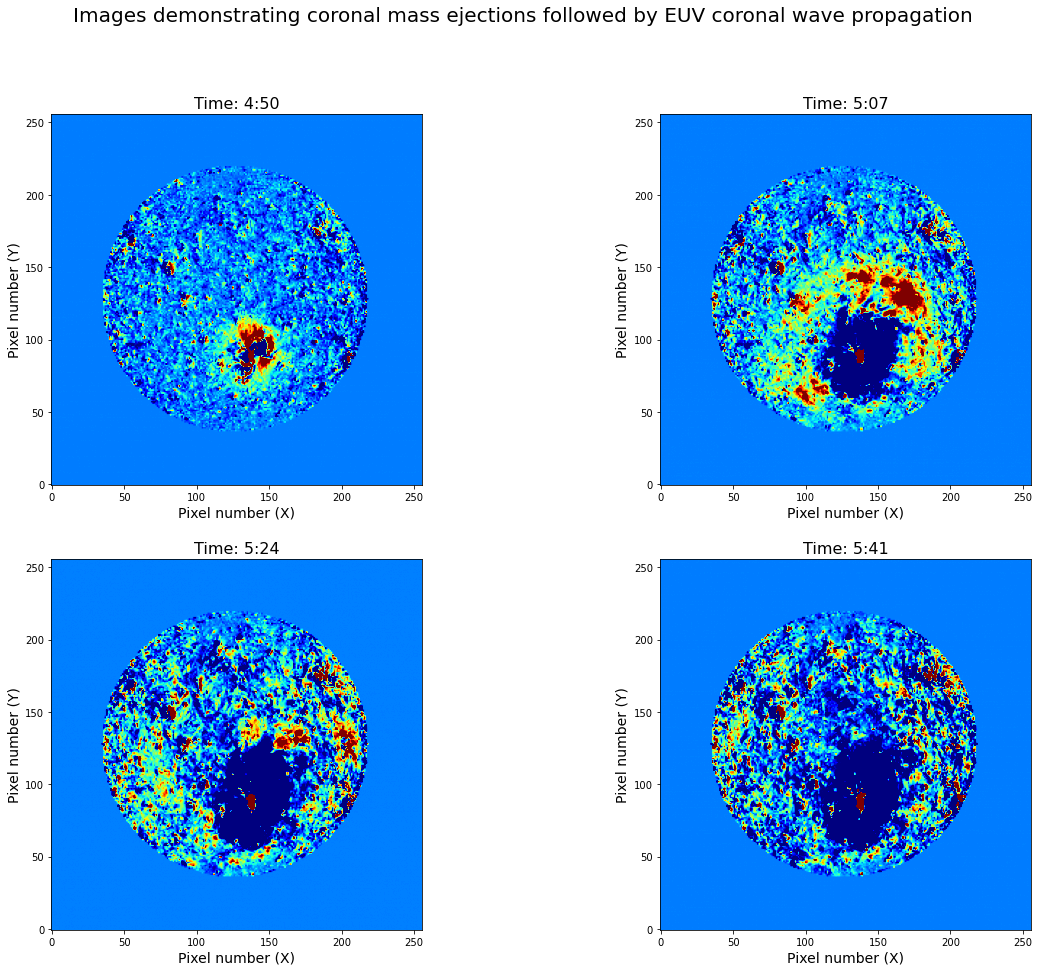

In [51]:
fig = plt.figure(figsize=(20, 15))

fig.suptitle("Images demonstrating coronal mass ejections followed by EUV coronal wave propagation", 
             fontsize=20)

ax1 = fig.add_subplot(2,2,1)
ax1.set_xlabel('Pixel number (X)', fontsize=14)
ax1.set_ylabel('Pixel number (Y)', fontsize=14)
ax1.imshow(df_im1, cmap='jet', norm=colors.Normalize(vmin=-100, vmax=300))
ax1.invert_yaxis()
ax1.set_title('Time: 4:50', fontsize=16)

ax2 = fig.add_subplot(2,2,2)
ax2.set_xlabel('Pixel number (X)', fontsize=14)
ax2.set_ylabel('Pixel number (Y)', fontsize=14)
ax2.imshow(df_im2, cmap='jet', norm=colors.Normalize(vmin=-100, vmax=300))
ax2.invert_yaxis()
ax2.set_title('Time: 5:07', fontsize=16);

ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel('Pixel number (X)', fontsize=14)
ax3.set_ylabel('Pixel number (Y)', fontsize=14)
ax3.imshow(df_im3, cmap='jet', norm=colors.Normalize(vmin=-100, vmax=300))
ax3.invert_yaxis()
ax3.set_title('Time: 5:24', fontsize=16);

ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel('Pixel number (X)', fontsize=14)
ax4.set_ylabel('Pixel number (Y)', fontsize=14)
ax4.imshow(df_im4, cmap='jet', norm=colors.Normalize(vmin=-100, vmax=300))
ax4.invert_yaxis()
ax4.set_title('Time: 5:41', fontsize=16);

**On the images, it is clearly seen how the EUV coronal mass wave was propagatin with time over 51 minutes.**

**Then, we load the boundaries of EUV wave front for every image:**

In [410]:
df_b1 = pd.read_csv('borders1.txt', header=None, delim_whitespace=True)
df_b2 = pd.read_csv('borders2.txt', header=None, delim_whitespace=True)
df_b3 = pd.read_csv('borders3.txt', header=None, delim_whitespace=True)
df_b4 = pd.read_csv('borders4.txt', header=None, delim_whitespace=True)

**And now we extract the data of interest within the given boundaries of the rho values:**

In [416]:
def bound(df, df_im, df_phi, b):
    pair = []
    for i in range(len(df)):
        for j in range(len(df)):
            if (df[i][j] > b[0][0]) and (df[i][j] < b[1][0]):
                pair.append([df_phi[i][j], df_im[i][j]])
    return pair

In [417]:
pair1 = bound(df_rho, df_im1, df_phi, df_b1)
pair2 = bound(df_rho, df_im2, df_phi, df_b2)
pair3 = bound(df_rho, df_im3, df_phi, df_b3)
pair4 = bound(df_rho, df_im4, df_phi, df_b4)

**Here we sort the determined polar angles in ascending order from 0 to 2$\pi$:**

In [418]:
def takeFirst(elem):
    return elem[0]

pair1.sort(key=takeFirst)
pair2.sort(key=takeFirst)
pair3.sort(key=takeFirst)
pair4.sort(key=takeFirst)

In [420]:
def XY(pair):
    x = []
    y = []
    for i in range(len(pair)):
        x.append(pair[i][0])
        y.append(pair[i][1])
    return x, y

**We are interested in dependencies of EUV wave intensity on the polar angle at different times while the wave was propagating:**

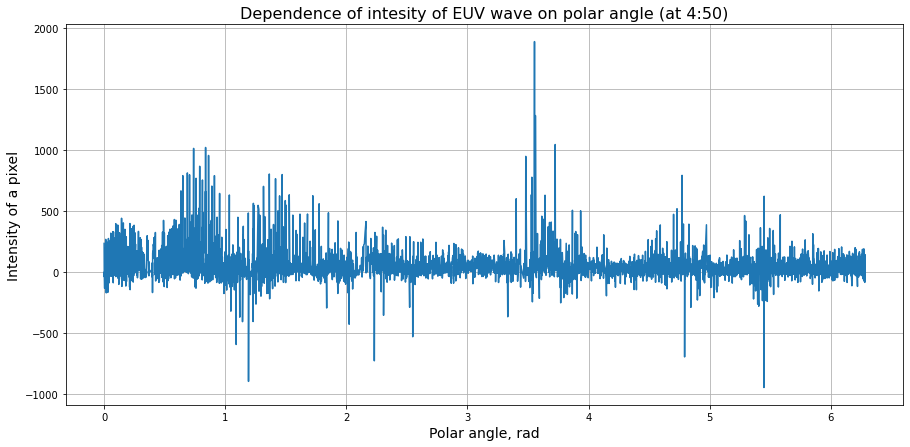

In [421]:
fig = plt.figure(figsize=(15,7))
plt.plot(XY(pair1)[0], XY(pair1)[1])
plt.title('Dependence of intesity of EUV wave on polar angle (at 4:50)', fontsize=16)
plt.ylabel('Intensity of a pixel', fontsize=14)
plt.xlabel('Polar angle, rad', fontsize=14)
plt.grid();

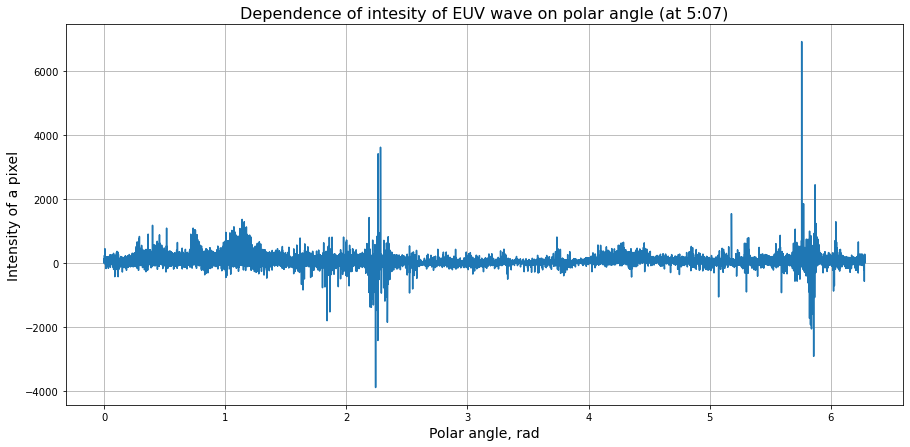

In [422]:
fig = plt.figure(figsize=(15,7))
plt.plot(XY(pair2)[0], XY(pair2)[1])
plt.title('Dependence of intesity of EUV wave on polar angle (at 5:07)', fontsize=16)
plt.ylabel('Intensity of a pixel', fontsize=14)
plt.xlabel('Polar angle, rad', fontsize=14)
plt.grid();

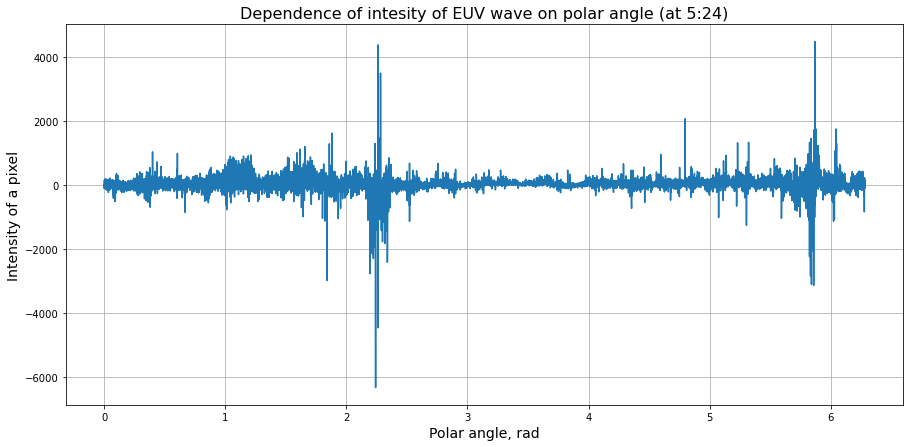

In [423]:
fig = plt.figure(figsize=(15,7))
plt.plot(XY(pair3)[0], XY(pair3)[1])
plt.title('Dependence of intesity of EUV wave on polar angle (at 5:24)', fontsize=16)
plt.ylabel('Intensity of a pixel', fontsize=14)
plt.xlabel('Polar angle, rad', fontsize=14)
plt.grid();

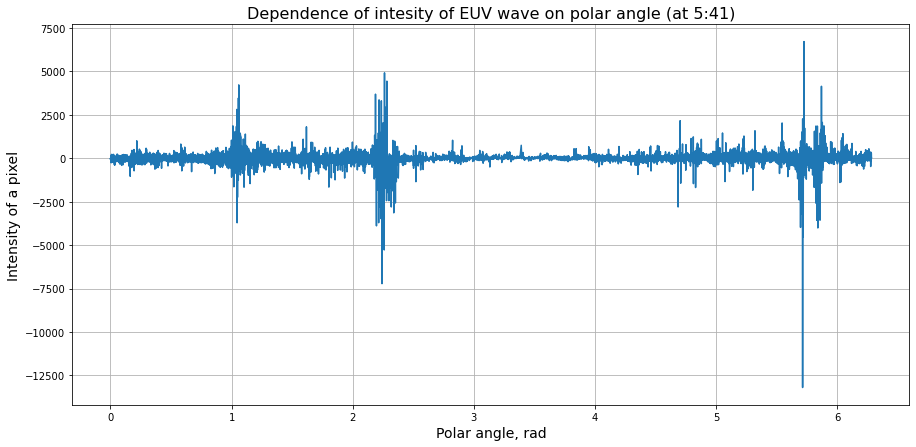

In [425]:
fig = plt.figure(figsize=(15,7))
plt.plot(XY(pair4)[0], XY(pair4)[1])
plt.title('Dependence of intesity of EUV wave on polar angle (at 5:41)', fontsize=16)
plt.ylabel('Intensity of a pixel', fontsize=14)
plt.xlabel('Polar angle, rad', fontsize=14)
plt.grid();

**However, these dependencies are not informative since they have much noise. To reduce the level of noise, we conduct smoothing procedure - the running mean. Each pixel value is replaced by the sum of all pixels of length $\frac{\pi}{8}$ centered on the considered point:**

In [507]:
def run_mean(x_val, y_val):
    y_temp = []
    y = np.zeros(len(y_val))
    
    for i in range (len(x_val)):
        for j in range(len(x_val)):
            if np.fabs(x_val[j] - x_val[i]) <= np.pi/16:
                y_temp.append(y_val[j])
        y[i] = np.sum(y_temp)
        y_temp = []            
    return y

In [426]:
Y1_RM = run_mean(XY(pair1)[0], XY(pair1)[1])
Y2_RM = run_mean(XY(pair2)[0], XY(pair2)[1])
Y3_RM = run_mean(XY(pair3)[0], XY(pair3)[1])
Y4_RM = run_mean(XY(pair4)[0], XY(pair4)[1])

**As a result, we get smoothed curves over an interval $[-\frac{\pi}{16}; \frac{\pi}{16}]$:**

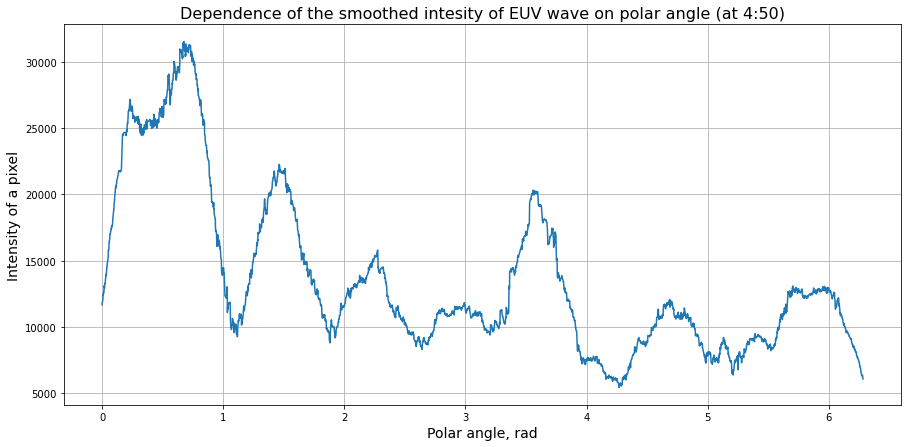

In [437]:
fig = plt.figure(figsize=(15,7))
plt.plot(XY(pair1)[0], Y1_RM)
plt.title('Dependence of the smoothed intesity of EUV wave on polar angle (at 4:50)', fontsize=16)
plt.ylabel('Intensity of a pixel', fontsize=14)
plt.xlabel('Polar angle, rad', fontsize=14)
plt.grid();

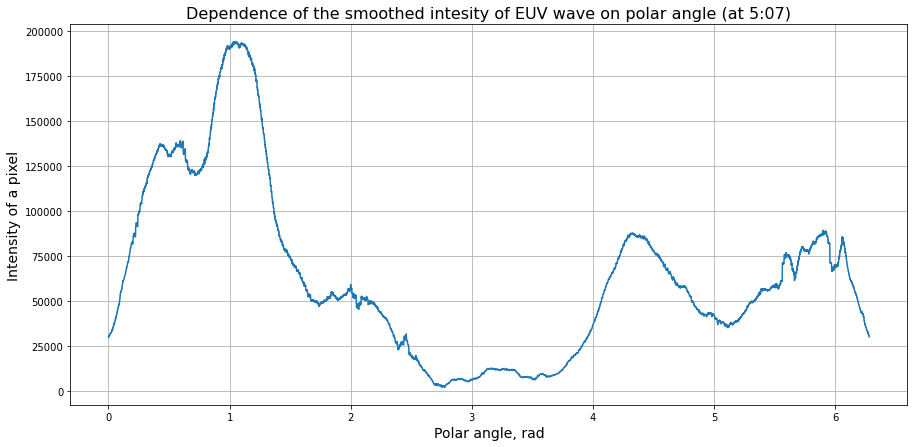

In [438]:
fig = plt.figure(figsize=(15,7))
plt.plot(XY(pair2)[0], Y2_RM)
plt.title('Dependence of the smoothed intesity of EUV wave on polar angle (at 5:07)', fontsize=16)
plt.ylabel('Intensity of a pixel', fontsize=14)
plt.xlabel('Polar angle, rad', fontsize=14)
plt.grid();

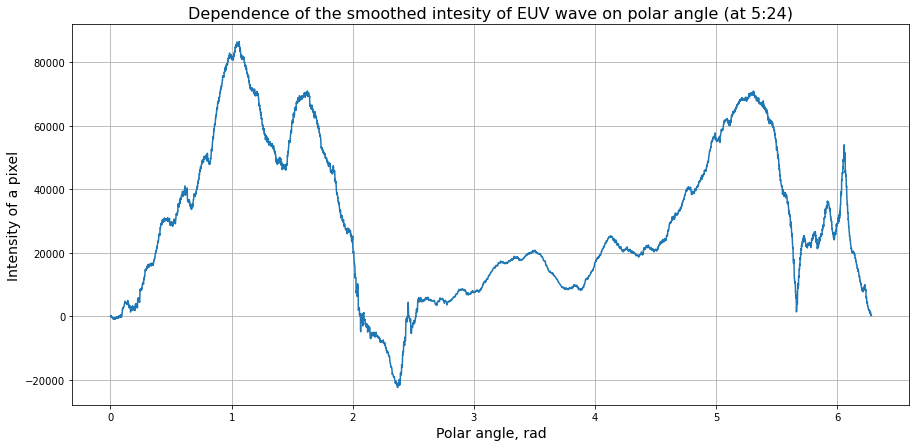

In [439]:
fig = plt.figure(figsize=(15,7))
plt.plot(XY(pair3)[0], Y3_RM)
plt.title('Dependence of the smoothed intesity of EUV wave on polar angle (at 5:24)', fontsize=16)
plt.ylabel('Intensity of a pixel', fontsize=14)
plt.xlabel('Polar angle, rad', fontsize=14)
plt.grid();

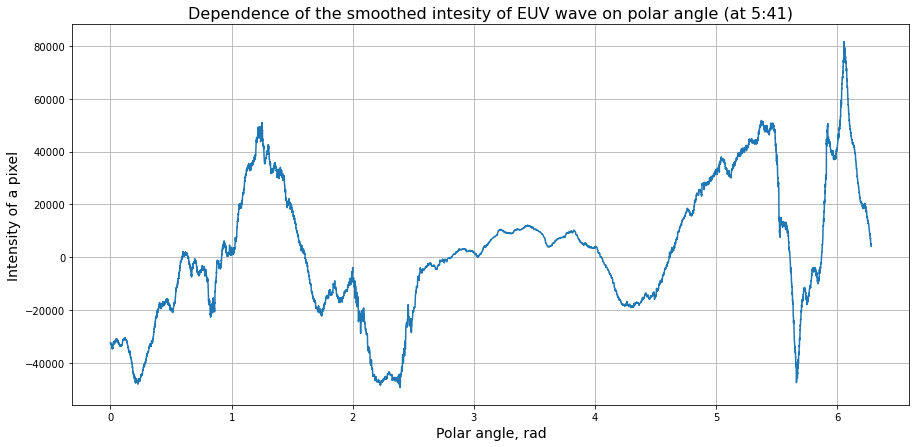

In [440]:
fig = plt.figure(figsize=(15,7))
plt.plot(XY(pair4)[0], Y4_RM)
plt.title('Dependence of the smoothed intesity of EUV wave on polar angle (at 5:41)', fontsize=16)
plt.ylabel('Intensity of a pixel', fontsize=14)
plt.xlabel('Polar angle, rad', fontsize=14)
plt.grid();

**On these plots, we observe a completely different behaviour of the intensity values vs polar angles for different times. At this point, we need tp delete pixels from the analysis that correspond to polar angles from 2 to 4 radians because they correspond to direction toward northwest and there is no propagation of EUV wave front toward this direction due to interaction with coronal hole. Moreover, we need to replace the negative values of intensities by zero as we need to analyze only bright intensities corresponding to EUV wave front.**

In [490]:
def cut(phi, inten):
    phi_new = []
    inten_new = []
    for i in range(len(phi)):
        if phi[i] < 2 or phi[i] > 4:
            phi_new.append(phi[i])
            if inten[i] < 0:
                inten[i] = 0
                inten_new.append(inten[i])
            else:
                inten_new.append(inten[i])
    return phi_new, inten_new

In [491]:
phi1, inten1 = cut(XY(pair1)[0], Y1_RM)
phi2, inten2 = cut(XY(pair2)[0], Y2_RM)
phi3, inten3 = cut(XY(pair3)[0], Y3_RM)
phi4, inten4 = cut(XY(pair4)[0], Y4_RM)

**Finally, we calculate the center of mass (intensity center) for each image:**

In [492]:
def mass_center(inten):
    N = np.linspace(0, len(inten)-1, len(inten))
    j = np.sum(np.dot(N, inten)) / np.sum(inten)
    return j

In [493]:
J1 = int(mass_center(inten1))
J2 = int(mass_center(inten2))
J3 = int(mass_center(inten3))
J4 = int(mass_center(inten4))

In [497]:
date = ['4:50', '5:07', '5:24', '5:41']
phi = [phi1[J1]*180/np.pi, phi2[J2]*180/np.pi, phi3[J3]*180/np.pi, phi4[J4]*180/np.pi]

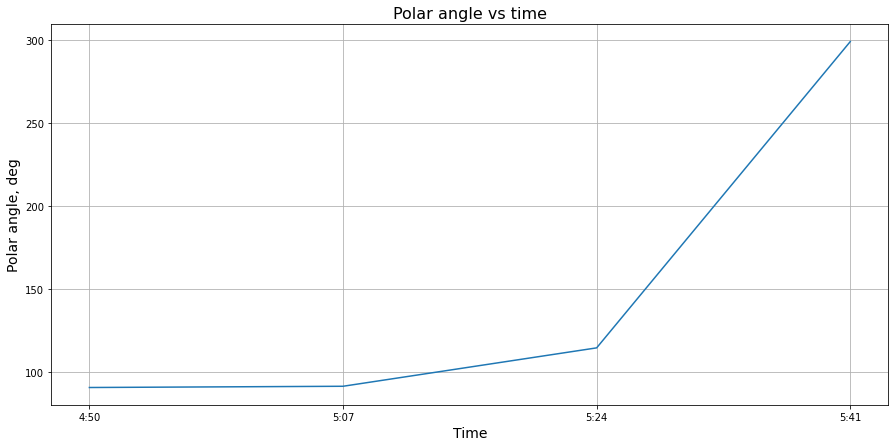

In [499]:
fig = plt.figure(figsize=(15,7))
plt.plot(date, phi)
plt.title('Polar angle vs time', fontsize=16)
plt.ylabel('Polar angle, deg', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid();

**As a result, we observe slight changes of the polar angle value during the first 17 minutes, a more noticeable growth over the next 17 minutes and a harsh rise during the final 17 minutes. Therefore, the rotation of EUV wave front is detected: the polar angle has changed from approximately 90 degrees to almost 300 degrees within the 51 minutes. The angular velocity is much higher on the last time interval in compatison with the initial period of the wave propagation.**

**Learning log:** In this assignment, we learned how to process the data obtained during EUV coronal mass ejection wave in order to determine the angular velocity of this wave. Surprisingly, we found out that the linear speed of these waves may overcome 1000 km/s. To implement the tasks, we needed to process four images of the waves by (1) selecting the pixels which actually correspond to the EUV wave front, (2) plotting the dependencies of intensity values vs polar angles (which were sorted firstly), (3) applying smoothing technique to eliminate the noise and then (4) removing pixels which correspond to the northwest direction of the wave (there is no propagation of the wave in this direction) and replacing negative values with zeros since we are interested in only bright intensities. Having compared the results of the smoothing with the proven data, it was observed that there might be some issues with smoothing of the third image which later affected the results of the angular velocity calculation. All the processed data was then used to find the center of mass (intensity center) of the wave and plotted versus time. As a result, we detected the rotation of the wave: the angular velocity on the first time intervals was much lower than the one for the final period. However, as it was mentioned before, there could be some errors in the running mean calculation which turned out to be quite a challenging task since before we met the running mean technique with fixed window size, while here it was a variation of the window size and its calculation turned out to be trickier than before. All in all, the overall behaviour of the wave is clear. 